<a href="https://colab.research.google.com/github/justrimoza/NFL-EDA/blob/main/NFL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install -q kaggle

In [ ]:
# from google.colab import files

# files.upload()

In [ ]:
#  ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c nfl-big-data-bowl-2022

In [ ]:
# ! unzip  nfl-big-data-bowl-2022.zip -d train

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle competitions download -c nfl-big-data-bowl-2022

 99% 778M/783M [00:10<00:00, 132MB/s]
100% 783M/783M [00:10<00:00, 81.0MB/s]


In [ ]:
! unzip  nfl-big-data-bowl-2022.zip -d train

Archive:  nfl-big-data-bowl-2022.zip
  inflating: train/PFFScoutingData.csv  
  inflating: train/games.csv         
  inflating: train/players.csv       
  inflating: train/plays.csv         
  inflating: train/tracking2018.csv  
  inflating: train/tracking2019.csv  
  inflating: train/tracking2020.csv  


## **Games Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train/games.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           764 non-null    int64 
 1   season           764 non-null    int64 
 2   week             764 non-null    int64 
 3   gameDate         764 non-null    object
 4   gameTimeEastern  764 non-null    object
 5   homeTeamAbbr     764 non-null    object
 6   visitorTeamAbbr  764 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.9+ KB


In [ ]:
df.isna().sum()

gameId             0
season             0
week               0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(3)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT


In [ ]:
# df['gameDateTime'] = df['gameDate'].str.cat(df['gameTimeEastern'], sep=' ')

In [ ]:
# df['gameDateTime'] = pd.to_datetime(df['gameDateTime'])

In [ ]:
df['month'] = df['gameDate'].apply(lambda x: int(x.split('/')[0]))
df['day'] = df['gameDate'].apply(lambda x: int(x.split('/')[1]))

In [ ]:
df.dtypes

gameId              int64
season              int64
week                int64
gameDate           object
gameTimeEastern    object
homeTeamAbbr       object
visitorTeamAbbr    object
month               int64
day                 int64
dtype: object

In [ ]:
df.nunique()

gameId             764
season               3
week                17
gameDate           151
gameTimeEastern     16
homeTeamAbbr        33
visitorTeamAbbr     33
month                5
day                 31
dtype: int64

In [ ]:
df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,month,day
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9


season
2020    256
2019    255
2018    253
Name: count, dtype: int64


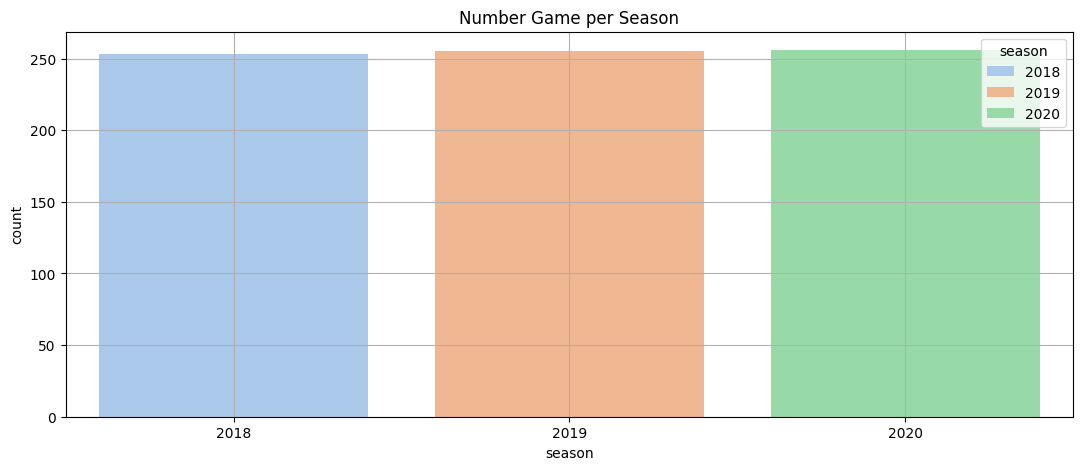

In [ ]:
print(df['season'].value_counts())
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x="season", hue="season", palette="pastel")
ax.set_title("Number Game per Season")
plt.grid()
plt.show()

month
1      16
9     169
10    176
11    183
12    220
Name: count, dtype: int64
month  season
1      2020      16
9      2019      62
       2018      59
       2020      48
10     2018      59
       2019      59
       2020      58
11     2020      70
       2019      57
       2018      56
12     2018      79
       2019      77
       2020      64
Name: count, dtype: int64


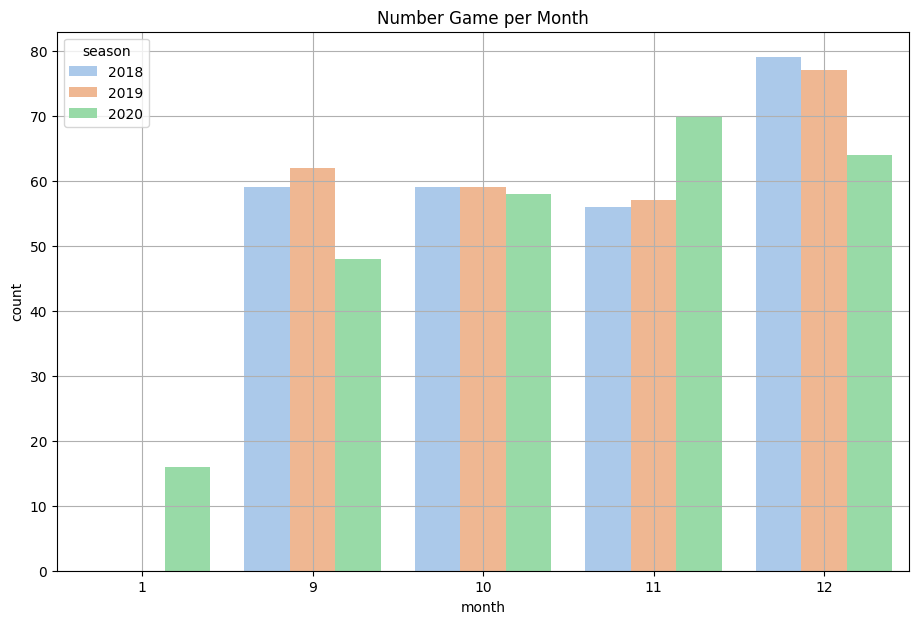

In [ ]:
print(df['month'].value_counts().sort_index())
print(df.groupby('month')['season'].value_counts())
plt.figure(figsize=(11,7))
ax = sns.countplot(data=df, x="month", hue="season", palette="pastel")
ax.set_title("Number Game per Month")
plt.grid()
plt.show()

week
1     45
2     48
3     48
4     44
5     44
6     43
7     42
8     43
9     41
10    41
11    41
12    45
13    47
14    48
15    48
16    48
17    48
Name: count, dtype: int64
week  season
1     2019      16
      2020      16
      2018      13
2     2018      16
      2019      16
      2020      16
3     2020      16
      2019      16
      2018      16
4     2018      15
      2020      15
      2019      14
5     2018      15
      2019      15
      2020      14
6     2018      15
      2019      14
      2020      14
7     2018      14
      2019      14
      2020      14
8     2019      15
      2018      14
      2020      14
9     2019      14
      2020      14
      2018      13
10    2018      14
      2020      14
      2019      13
11    2020      14
      2019      14
      2018      13
12    2020      16
      2018      15
      2019      14
13    2018      16
      2019      16
      2020      15
14    2018      16
      2019      16
      2020      16
15   

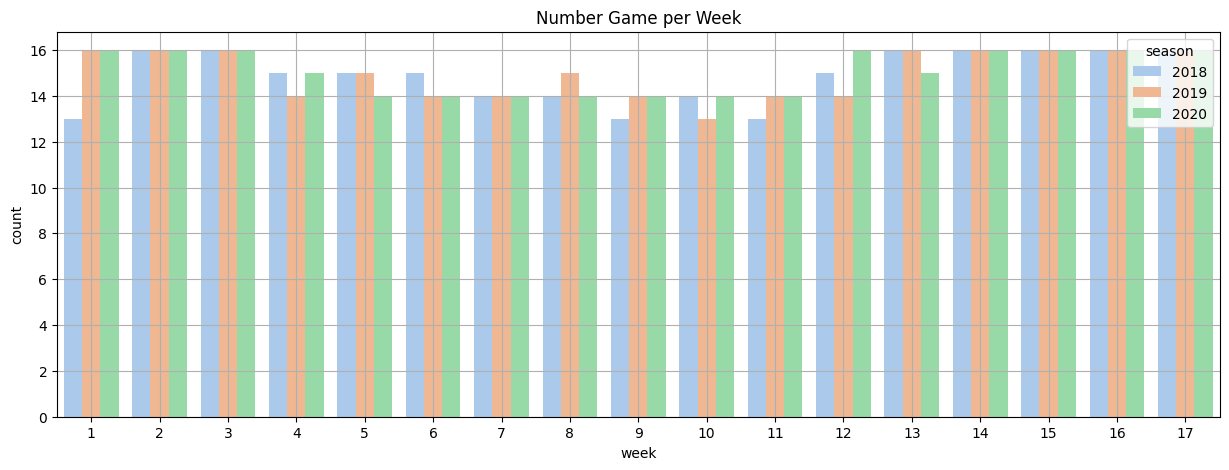

In [ ]:
print(df['week'].value_counts().sort_index())
print(df.groupby('week')['season'].value_counts())
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x="week", hue="season", palette="pastel")
ax.set_title("Number Game per Week")
plt.grid()
plt.show()

day
1     27
2     17
3     30
4     25
5      6
6     27
7     17
8     43
9     28
10    17
11    25
12     5
13    42
14    18
15    44
16    29
17    17
18    25
19     7
20    39
21    19
22    45
23    30
24    16
25    26
26     8
27    39
28    18
29    43
30    31
31     1
Name: count, dtype: int64
day  season
1    2020      13
     2019      12
     2018       2
2    2018      14
     2020       2
               ..
29   2018       2
30   2018      29
     2019       1
     2020       1
31   2019       1
Name: count, Length: 91, dtype: int64


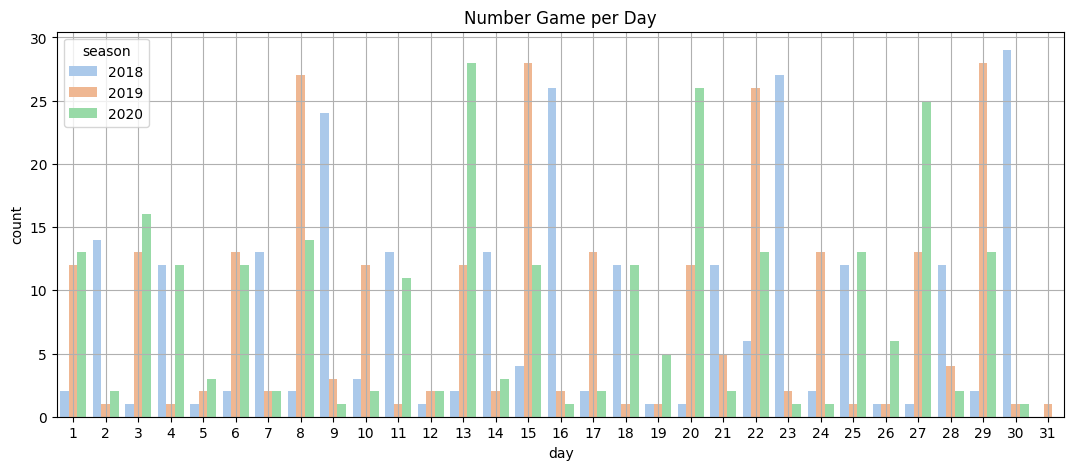

In [ ]:
print(df['day'].value_counts().sort_index())
print(df.groupby('day')['season'].value_counts())
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x="day", hue="season", palette="pastel")
ax.set_title("Number Game per Day")
plt.grid()
plt.show()

gameTimeEastern
09:30:00      4
12:30:00      3
13:00:00    403
15:40:00      1
16:05:00     71
16:25:00    119
16:30:00      9
17:00:00      2
19:00:00      1
19:05:00      1
19:10:00      3
20:05:00      1
20:15:00     47
20:20:00     95
21:00:00      1
22:20:00      3
Name: count, dtype: int64
gameTimeEastern  season
09:30:00         2018        2
                 2019        2
12:30:00         2020        1
                 2019        1
                 2018        1
13:00:00         2019      137
                 2018      136
                 2020      130
15:40:00         2020        1
16:05:00         2020       25
                 2019       24
                 2018       22
16:25:00         2020       42
                 2019       39
                 2018       38
16:30:00         2020        4
                 2018        3
                 2019        2
17:00:00         2020        2
19:00:00         2020        1
19:05:00         2020        1
19:10:00         2018      

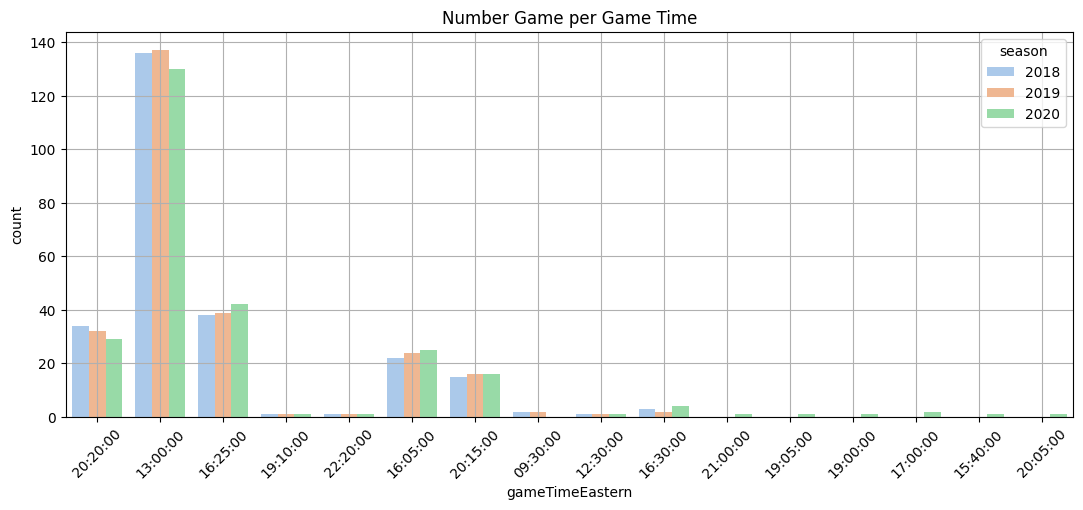

In [ ]:
print(df['gameTimeEastern'].value_counts().sort_index())
print(df.groupby('gameTimeEastern')['season'].value_counts())
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x="gameTimeEastern", hue="season", palette="pastel")
ax.set_title("Number Game per Game Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **Player Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
players = pd.read_csv("/content/train/players.csv")

In [ ]:
players.shape

(2732, 7)

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


In [ ]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [ ]:
hcm = players['height'].str.split('-', expand=True)

In [ ]:
hcm.loc[hcm[1].notnull(), 0] = hcm[hcm[1].notnull()][0].astype(np.int16) * 12 + hcm[hcm[1].notnull()][1].astype(np.int16)

In [ ]:
players['height'] = hcm[0]

In [ ]:
players['height'] = players['height'].astype(np.float32)
players['height'] *= 2.54
players['height'] = players['height'].round(0)

In [ ]:
players.isna().sum()

nflId           0
height          0
weight          0
birthDate      17
collegeName     8
Position        0
displayName     0
dtype: int64

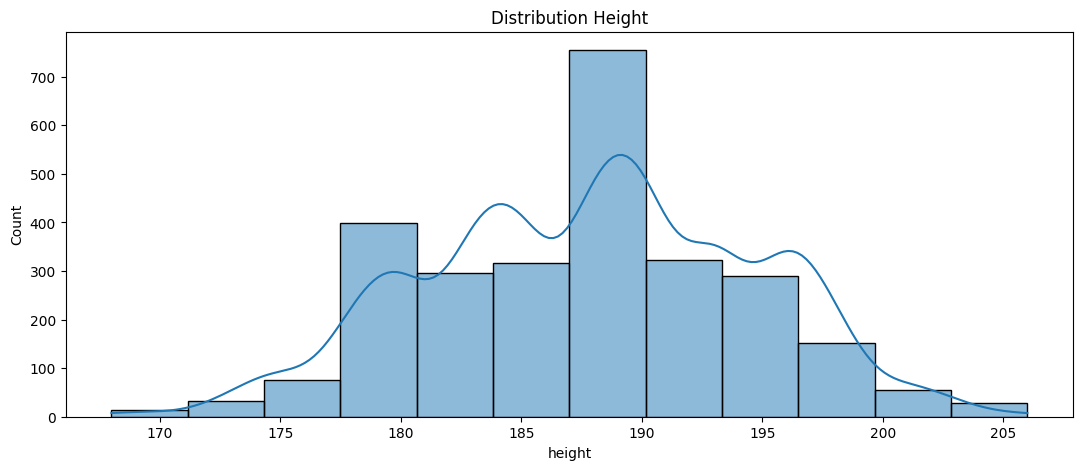

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.histplot(players['height'], bins=12, kde=True)
plt.title("Distribution Height")
plt.show()

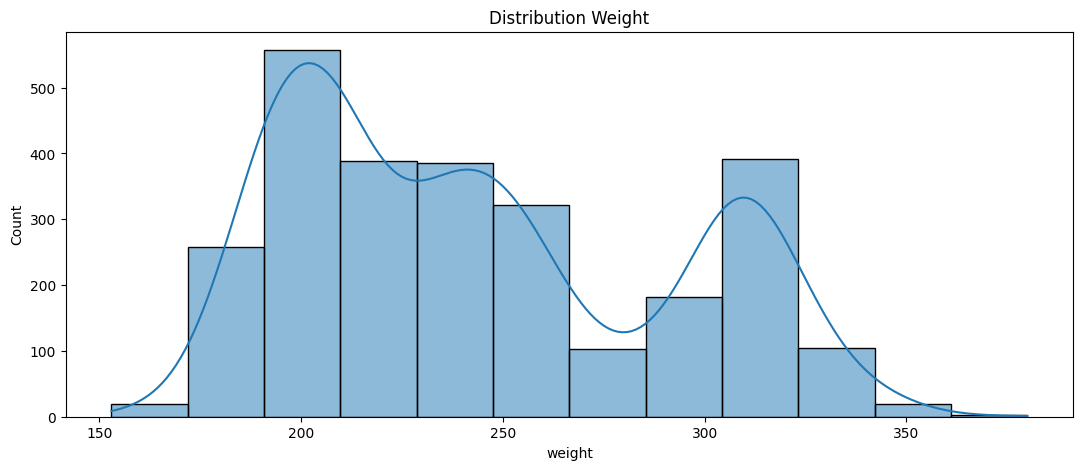

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.histplot(players['weight'],kde=True, bins=12)
plt.title("Distribution Weight")
plt.show()

In [ ]:
players.dropna(subset=['birthDate'], inplace=True)

In [ ]:
for idx, row in players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # ex) 11/17/1992
        players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]

    elif len(row['birthDate'].split('-')) == 3: # ex) 1996-06-20
        players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]

In [ ]:
players.sample(5)

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear
1361,35521,180.0,180,1987-03-17,Southern Methodist,WR,Emmanuel Sanders,1987
1961,43464,180.0,221,1994-02-18,Akron,OLB,Jatavis Brown,1994
1898,45266,183.0,233,1994-04-15,Oregon State,FB,Ricky Ortiz,1994
2688,46766,193.0,320,01/17/1995,Penn State,G,Brendan Mahon,1995
2343,43850,190.0,255,08/06/1994,South Florida,DE,Eric Lee,1994


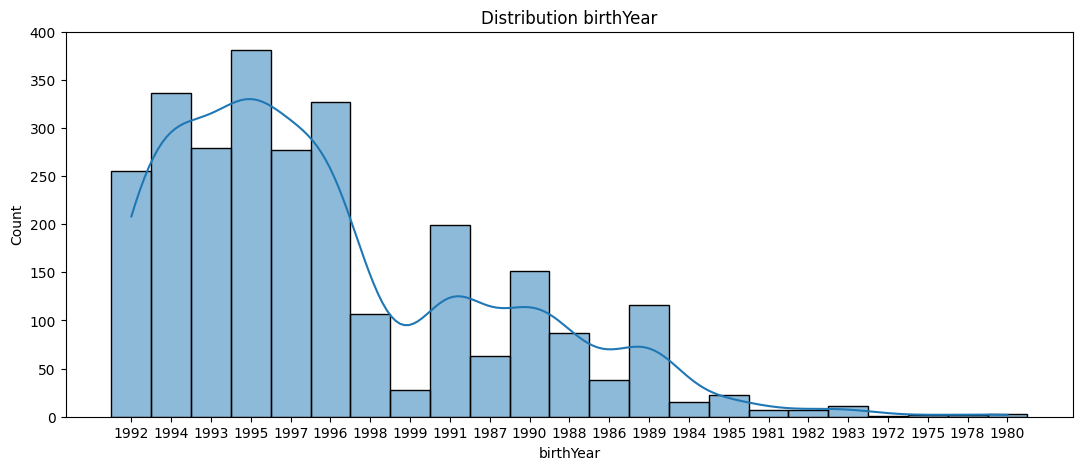

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.histplot(players['birthYear'],kde=True, bins=12)
plt.title("Distribution birthYear")
plt.show()

In [ ]:
players['birthYear'].min(), players['birthYear'].max()

('1972', '1999')

In [ ]:
players.loc[players['collegeName'].isna()]

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear
1441,52770,183.0,206,1998-08-01,NaN,RB,Javon Leake,1998
1564,52859,180.0,210,1996-02-28,NaN,RB,Rodney Smith,1996
1823,52735,178.0,182,1997-02-18,NaN,P,Brandon Wright,1997


In [ ]:
players.dropna(subset=['collegeName'], inplace=True)

In [ ]:
top_college = players['collegeName'].value_counts()[:10].reset_index()
top_college

,collegeName,count
0,Alabama,67
1,Ohio State,56
2,Florida,55
3,Louisiana State,51
4,Georgia,47
5,Penn State,45
6,Miami,45
7,Notre Dame,44
8,Clemson,44
9,Michigan,44


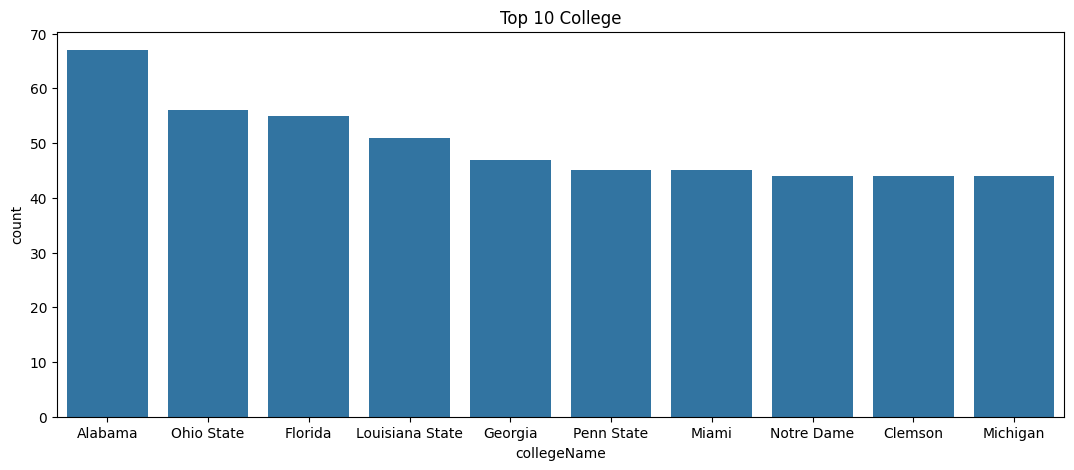

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.barplot(data=top_college, x='collegeName', y='count')
plt.title("Top 10 College")
plt.show()

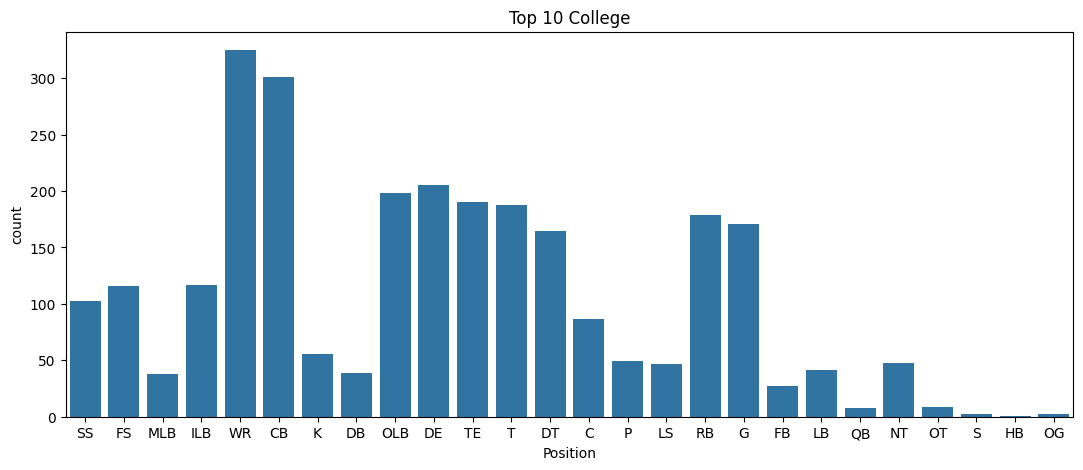

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=players, x='Position')
plt.title("Top 10 College")
plt.show()

## Play Data

In [ ]:
plays = pd.read_csv('/content/train/plays.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
plays.shape

(19979, 25)

In [ ]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

In [ ]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,02:20:00,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,01:49:00,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,NaN,NaN,SEA,15,00:23:00,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


In [ ]:
plays.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                    101
returnerId                13041
kickBlockerId             19879
yardlineSide                166
yardlineNumber                0
gameClock                     0
penaltyCodes              18877
penaltyJerseyNumbers      18877
penaltyYards              18877
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                19934
kickLength                 3652
kickReturnYardage         14655
playResult                    0
absoluteYardlineNumber        0
dtype: int64

In [ ]:
plays.duplicated().sum()

0

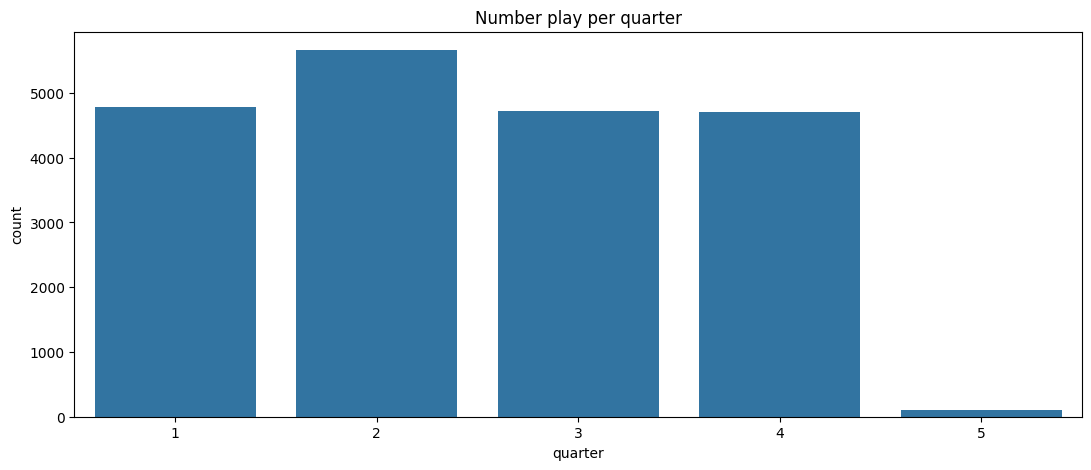

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=plays, x='quarter')
plt.title("Number play per quarter")
plt.show()

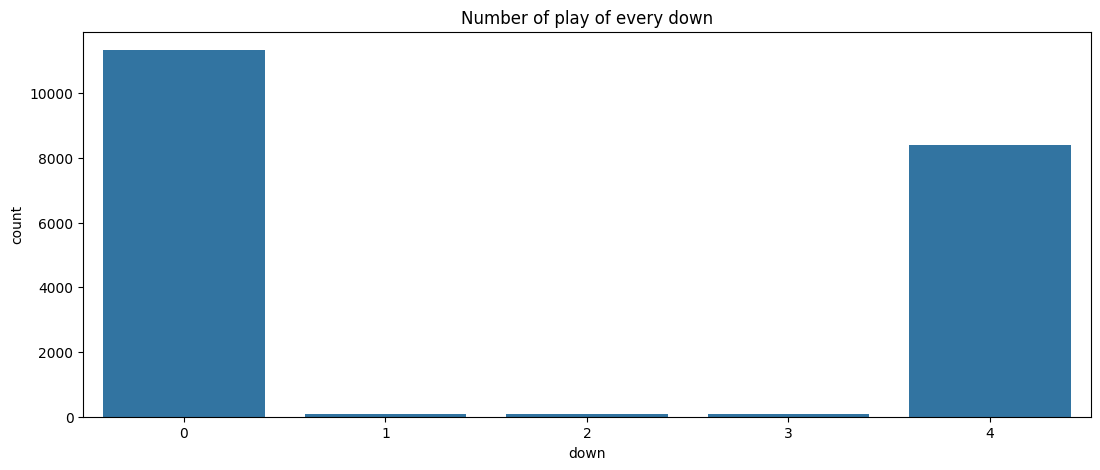

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=plays, x='down')
plt.title("Number of play of every down")
plt.show()

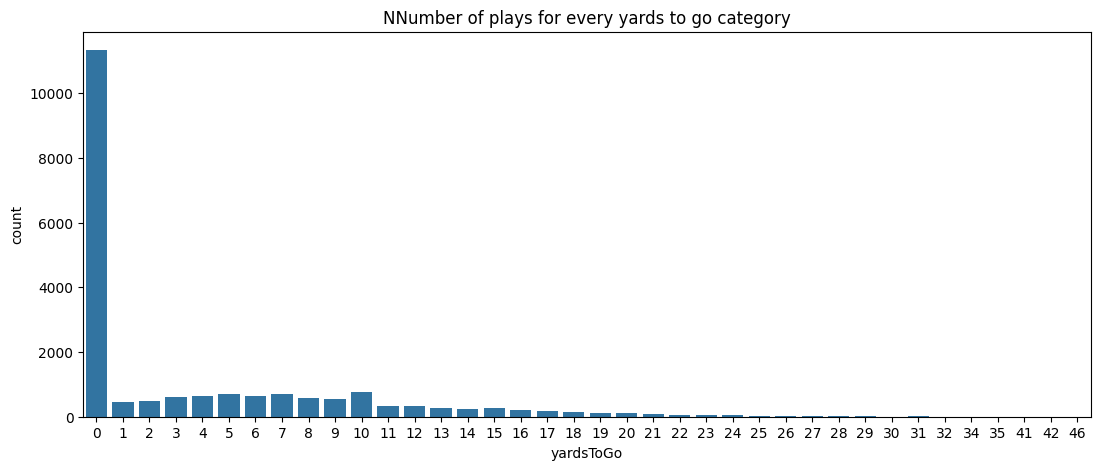

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=plays, x='yardsToGo')
plt.title("NNumber of plays for every yards to go category")
plt.show()

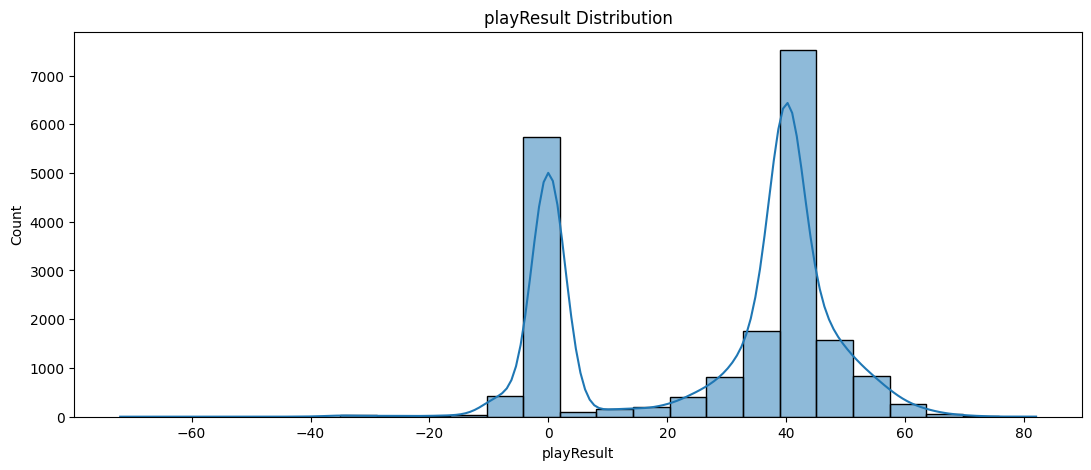

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.histplot(plays['playResult'], bins=25, kde=True)
plt.title("playResult Distribution")
plt.show()

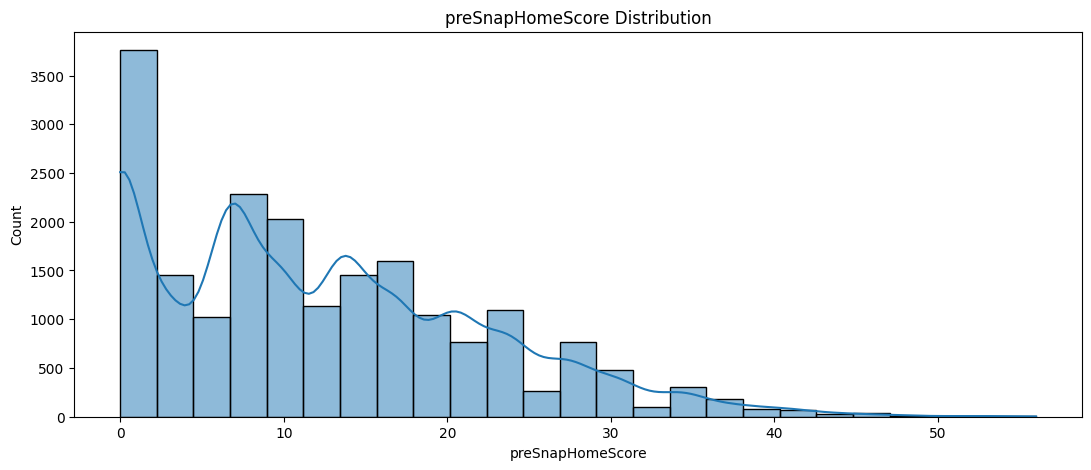

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.histplot(plays['preSnapHomeScore'], bins=25, kde=True)
plt.title("preSnapHomeScore Distribution")
plt.show()

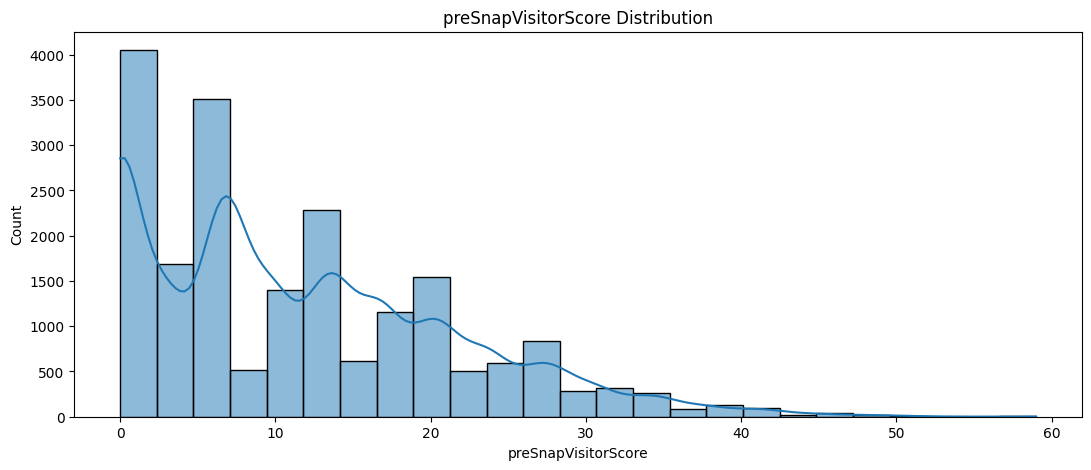

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.histplot(plays['preSnapVisitorScore'], bins=25, kde=True)
plt.title("preSnapVisitorScore Distribution")
plt.show()